Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**.

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;



# "Optimización de gastos de marketing en Showz: Estrategias basadas en análisis de datos para maximizar el rendimiento".

Introducción:


Este proyecto busca optimizar los gastos de marketing de la empresa. Se analizarán datos de visitas, pedidos y gastos publicitarios de enero de 2017 a diciembre de 2018 para entender el comportamiento de los clientes y mejorar la eficacia de las inversiones en marketing.

Objetivo:


El objetivo es evaluar cómo los clientes usan el servicio, cuándo compran, cuánto aportan en ingresos y en qué momento los ingresos cubren los costos de adquisición. Este análisis ayudará a redistribuir el presupuesto de marketing de forma más eficiente.

Etapas del análisis:


Preparación de datos: 
Cargar y optimizar los datos, realizando limpieza y enrriquecimiento de los datos para su correcto análisis.

Análisis de métricas:
Evaluar las visitas al sitio, el comportamiento de compra de los usuarios (valor de vida del cliente, LTV) y los gastos de marketing, como el costo de adquisición de clientes (CAC) y el retorno sobre la inversión en marketing (ROMI).

Visualización: 

Crear gráficos para mostrar tendencias y diferencias por dispositivo y fuente de adquisición.


Conclusión:


Con base en las métricas de rentabilidad (CAC, LTV, ROMI), se recomendarán los canales de marketing más efectivos para optimizar el presupuesto e incrementar los ingresos de Showz.

In [1]:
# Importamos las librerías que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import ttest_ind
from scipy.stats import levene

In [2]:
# Cargamos los datasets
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv') 
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
# Analizamos la información del dataset visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [4]:
# Verificamos las columnas del dataset visits
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [5]:
# Analizamos la información del dataset visits
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [6]:
# Revisamos que no existan datos nulos del dataset visits
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
# Colocamos todos los títulos en minúsculas y reemplazamos el espacio entre las palabras del dataset visits
visits.columns = visits.columns.str.lower().str.replace(' ', '_')
visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [8]:
# Convertimos las columnas 'start_ts' y 'end_ts' a formato datetime
visits['start_ts'] = pd.to_datetime(visits['start_ts'],format= '%Y-%m-%d %H:%M:%S')
visits['end_ts'] = pd.to_datetime(visits['end_ts'],format= '%Y-%m-%d %H:%M:%S')
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [9]:
# Analizamos la información del dataset orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [10]:
# Verificamos las columnas del dataset orders
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
# Analizamos la información del dataset orders
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
# Revisamos que no existan datos nulos del dataset orders
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [13]:
# Colocamos todos los títulos en minúsculas y sustituimos el espacio del dataset orders
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [14]:
# Convertimos la columna 'buy_ts' a formato datetime
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'],format= '%Y-%m-%d %H:%M:%S')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [15]:
# Analizamos la información del dataset costs
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [16]:
# Verificamos las columnas del dataset costs
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [17]:
# Analizamos la información del dataset costs
costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [18]:
# Revisamos que no existan datos nulos del dataset costs
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

In [19]:
# Convertimos la columna 'dt' a formato datetime
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Después de analizar cada dataset que teníamos, procedimos a realizar los cambios necesarios para el correcto funcionamiento de los datos. Estos cambios incluyeron convertir todos los datos a minúsculas, cambiar la separación por espacios a guiones y modificar el formato de las fechas.
    
A continuacion procederemos con el análisis de la información.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente inicio en el análisis de los datos! Has implementado un proceso claro y bien organizado para explorar y preparar cada dataset. La estandarización de los nombres de columnas y el formato de fechas en los tres datasets es un paso fundamental para facilitar el análisis y garantizar la consistencia en el trabajo posterior. Además, el uso de `info()`, `describe()` y `isna().sum()` muestra una buena comprensión de cómo verificar la estructura y la calidad de los datos.

Sigue adelante con este nivel de detalle, ya que construir una base sólida es clave para obtener resultados precisos en el análisis. ¡Vas muy bien, continúa con este enfoque cuidadoso y organizado! 😊
</div>

In [20]:
# Contamos la cantidad de visitas por tipo de dispositivo utilizado por los usuarios
visits.value_counts('device')

device
desktop    262567
touch       96833
dtype: int64

In [21]:
# Contamos la cantidad de visitas según el identificador de la fuente que atrajo a los usuarios
visits.value_counts('source_id')

source_id
4     101794
3      85610
5      66905
2      47626
1      34121
9      13277
10     10025
7         36
6          6
dtype: int64

In [22]:
# Imprimimos las fechas mínimas y máximas de las columnas 'start_ts' y 'end_ts' para entender el rango de las visitas
print(visits['start_ts'].min())
print(visits['start_ts'].max())
print(visits['end_ts'].min())
print(visits['end_ts'].max())

2017-06-01 00:01:00
2018-05-31 23:59:00
2017-06-01 00:02:00
2018-06-01 01:26:00


In [23]:
# Filtramos las visitas cuya sesión terminó después del 1 de junio de 2018
visits[visits['end_ts']>'2018-06-01']

,device,end_ts,source_id,start_ts,uid
2330,desktop,2018-06-01 00:05:00,2,2018-05-31 23:30:00,5300693976971713685
43215,desktop,2018-06-01 00:13:00,4,2018-05-31 23:46:00,12296626599487328624
46667,desktop,2018-06-01 00:13:00,5,2018-05-31 23:48:00,1107134732939577311
154728,desktop,2018-06-01 00:09:00,2,2018-05-31 22:52:00,12484396335714047199
198329,desktop,2018-06-01 00:11:00,3,2018-05-31 23:59:00,3720373600909378583
216791,touch,2018-06-01 00:06:00,5,2018-05-31 23:45:00,9951896961656595558
263781,desktop,2018-06-01 00:25:00,1,2018-05-31 23:59:00,4906562732540547408
269213,touch,2018-06-01 00:12:00,10,2018-05-31 23:59:00,10723414689244282024
288563,touch,2018-06-01 00:01:00,4,2018-05-31 23:37:00,1094281763368510391
299620,desktop,2018-06-01 00:04:00,4,2018-05-31 23:59:00,83872787173869366


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Son sesiones que comenzaron el día anterior, pero finalizaron justo en el último día de nuestro análisis. Estas sesiones ocurrieron durante las dos primeras horas de ese día, por lo que no creo que afecten significativamente el análisis. Además, nos dimos cuenta de que los datos que analizamos no abarcan desde enero de 2017 hasta diciembre de 2018, sino que cubren el período del 1 de junio de 2017 al 1 de junio de 2018.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo al explorar las visitas de los usuarios y profundizar en las fechas de inicio y finalización de las sesiones. Contabilizar el número de visitas por tipo de dispositivo y por fuente de atracción es una manera eficaz de identificar patrones de comportamiento, lo cual es muy valioso para análisis posteriores de segmentación. Además, la verificación del rango de fechas en las columnas `start_ts` y `end_ts` ayuda a comprender la cobertura temporal de los datos y asegurar la precisión de las conclusiones.

Es destacable que hayas tenido en cuenta las sesiones que terminaron en el primer día de junio de 2018, así como la observación sobre el período efectivo de datos. Estas decisiones reflejan una comprensión sólida del impacto de los datos en el análisis. 

¡Sigue así! Estás haciendo un gran trabajo en el manejo y análisis de tus datos. 😊
</div>

In [24]:
# Imprimimos las fechas mínima y máxima de la columna 'buy_ts' para conocer el rango de tiempo de las compras
print(orders['buy_ts'].min())
print(orders['buy_ts'].max())

2017-06-01 00:10:00
2018-06-01 00:02:00


In [25]:
# Imprimimos las fechas mínima y máxima de la columna 'dt' para conocer el rango de tiempo de los gastos de marketing
print(costs['dt'].min())
print(costs['dt'].max())

2017-06-01 00:00:00
2018-05-31 00:00:00


In [26]:
# Extraemos y agregamos las columnas: mes de inicio, semana de inicio y fecha exacta de inicio de las visitas.
visits['session_month'] = visits['start_ts'].dt.month
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_date'] = visits['start_ts'].dt.date
visits.head()

,device,end_ts,source_id,start_ts,uid,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,12,52,2017-12-27


In [27]:
# Analizamos las visitas por usuarios por día y calculamos su promedio
visits_by_day = visits.groupby('session_date')['uid'].nunique().sort_index()
print('Promedio de usuarios por dia',visits_by_day.mean())

Promedio de usuarios por dia 907.9917582417582


In [28]:
# Analizamos las visitas por usuarios por semana y calculamos su promedio
visits_by_week = visits.groupby('session_week')['uid'].nunique().sort_index()
print('Promedio de usuarios por semana',visits_by_week.mean())

Promedio de usuarios por semana 5825.288461538462


In [29]:
# Analizamos las visitas por usuarios por mes y calculamos su promedio
visits_by_month = visits.groupby('session_month')['uid'].nunique().sort_index()
print('Promedio de usuarios por mes',visits_by_month.mean())

Promedio de usuarios por mes 23228.416666666668


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buen trabajo en esta sección! Tu enfoque en calcular los rangos de tiempo para las compras y los gastos de marketing permite una excelente comprensión del periodo completo que abarcan los datos. 

La adición de columnas que extraen mes, semana y fecha exacta de inicio en las visitas es una práctica que enriquece el análisis temporal, y la agrupación por día, semana y mes para evaluar el promedio de usuarios únicos demuestra un enfoque bien organizado para obtener una visión clara de la frecuencia de visitas. Estos pasos son fundamentales para capturar patrones de uso y para una segmentación efectiva de los datos de visitas. 

¡Continúa con este excelente nivel de detalle y análisis! 😊
</div>

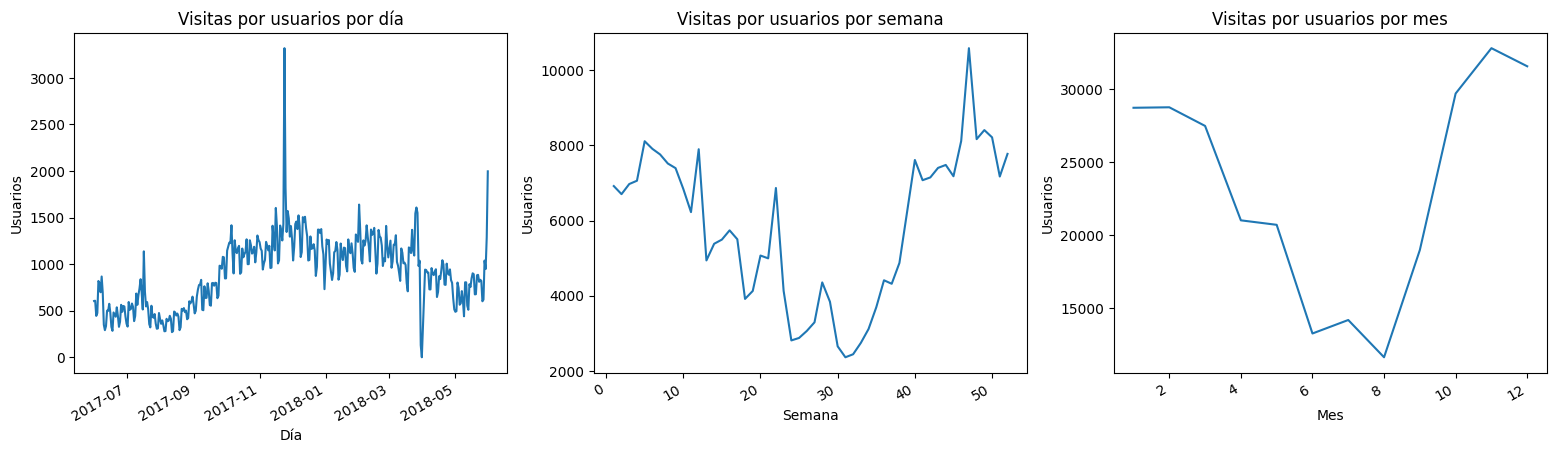

In [30]:
# Generamos una gráfica para visualizar el número de visitas por usuarios en diferentes períodos (día, semana, mes)
fig, ax = plt.subplots(1,3, figsize=(19,5))
ax[0].plot(visits_by_day)
ax[0].set(title='Visitas por usuarios por día', xlabel='Día', ylabel='Usuarios')
ax[1].plot(visits_by_week)
ax[1].set(title='Visitas por usuarios por semana', xlabel='Semana', ylabel='Usuarios')
ax[2].plot(visits_by_month)
ax[2].set(title='Visitas por usuarios por mes', xlabel='Mes', ylabel='Usuarios')
fig.autofmt_xdate(rotation=30)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente visualización! La separación de visitas por día, semana y mes es muy útil para entender patrones a diferentes niveles de agregación temporal, y tus etiquetas y títulos son claros, lo cual facilita la interpretación de los gráficos. Además, el ajuste de la rotación en las fechas mejora la legibilidad.

Incluir esta representación gráfica es clave para identificar tendencias estacionales o cambios de comportamiento a lo largo del tiempo. Continúa aplicando esta estructura, ya que facilita la comunicación de los hallazgos en el análisis de datos. ¡Sigue así!
</div>

In [31]:
# Agrupamos las visitas por fecha de sesión para calcular número total de sesiones por día y número de usuarios únicos por día
sessions_per_users = visits.groupby('session_date').agg({'uid':['count','nunique']})
sessions_per_users.columns = ['n_session','n_users']


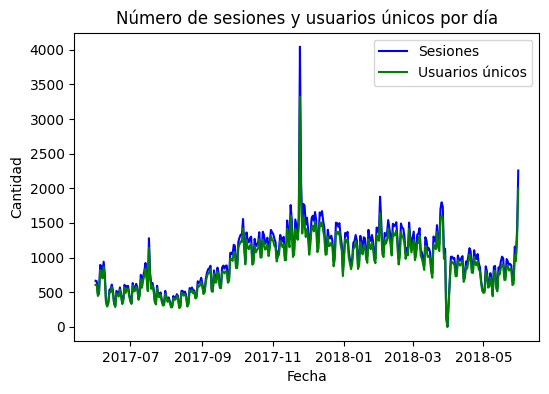

In [32]:
# Hacemos gráfica de valores absolutos de número de sesiones y usuarios unicos
# Reseteamos el índice para facilitar la graficación
sessions_per_users_reset = sessions_per_users.reset_index()

plt.figure(figsize=(6, 4))
sns.lineplot(data=sessions_per_users_reset, x='session_date', y='n_session', label='Sesiones', color='blue')
sns.lineplot(data=sessions_per_users_reset, x='session_date', y='n_users', label='Usuarios únicos', color='green')
plt.title('Número de sesiones y usuarios únicos por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.show()


In [33]:
# Calculamos el promedio de sesiones por usuario dividiendo el número total de sesiones entre el número de usuarios únicos
sessions_per_users['session_user'] =sessions_per_users['n_session']/sessions_per_users['n_users']
sessions_per_users['session_user'].head()

session_date
2017-06-01    1.097521
2017-06-02    1.082237
2017-06-03    1.071910
2017-06-04    1.071429
2017-06-05    1.089024
Name: session_user, dtype: float64

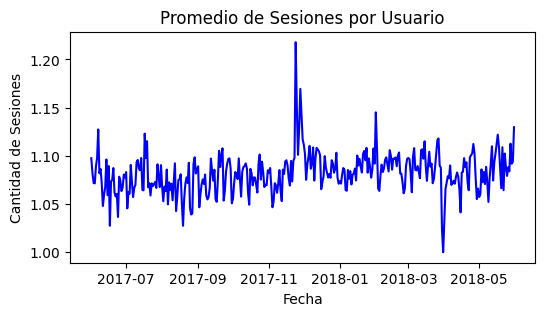

In [34]:
# Creamos una gráfica para visualizar el promedio de sesiones por usuario
plt.figure(figsize=(6, 3))
sessions_per_users['session_user'].plot(color='blue')
plt.title('Promedio de Sesiones por Usuario')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Sesiones')
plt.show()

In [35]:
# Calculamos el promedio de sesiones por usuario, redondeado a dos decimales
print('El promedio de sesiones por usuario es de:',round(sessions_per_users['session_user'].mean(),2))

El promedio de sesiones por usuario es de: 1.08


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo! La organización de los datos y las gráficas proporcionan una visión clara de la relación entre sesiones y usuarios únicos a lo largo del tiempo. La visualización de sesiones y usuarios por día es particularmente útil para observar patrones diarios de actividad, y la gráfica adicional del promedio de sesiones por usuario brinda un análisis valioso sobre el compromiso de los usuarios.

El cálculo y la representación del promedio de sesiones por usuario es una adición inteligente, ayudando a evaluar la frecuencia con la que los usuarios regresan al sitio. ¡Sigue así, aplicando estas técnicas de análisis detallado!
</div>

In [36]:
# Calculamos la duración de cada sesión en segundos y la almacenamos en 'duration_session'
visits['duration_session'] = (visits['end_ts']-visits['start_ts']).dt.seconds 
visits['duration_session'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: duration_session, dtype: float64

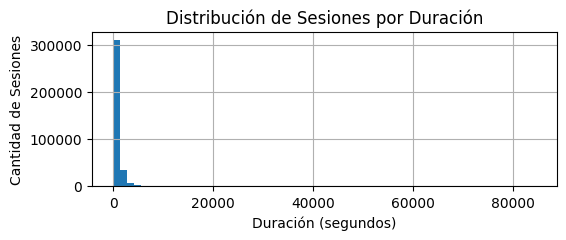

In [37]:
# Creamos un histograma para visualizar la distribución de la duración de las sesiones (en segundos)
plt.figure(figsize=(6, 2))
visits['duration_session'].hist(bins=60)
plt.title('Distribución de Sesiones por Duración')
plt.xlabel('Duración (segundos)')
plt.ylabel('Cantidad de Sesiones')
plt.show()


In [38]:
# Calculamos y mostramos estadísticas descriptivas de la duración de las sesiones en minutos:
print('El promedio de la duración de una sesión es de:', round(visits['duration_session'].mean()/60), ' minutos')
print('La mediana de la duración de una sesión es de:', round(visits['duration_session'].median()/60), ' minutos')
print('La moda de la duración de una sesión es de:', round(visits['duration_session'].mode()[0]/60), ' minutos')

El promedio de la duración de una sesión es de: 11  minutos
La mediana de la duración de una sesión es de: 5  minutos
La moda de la duración de una sesión es de: 1  minutos


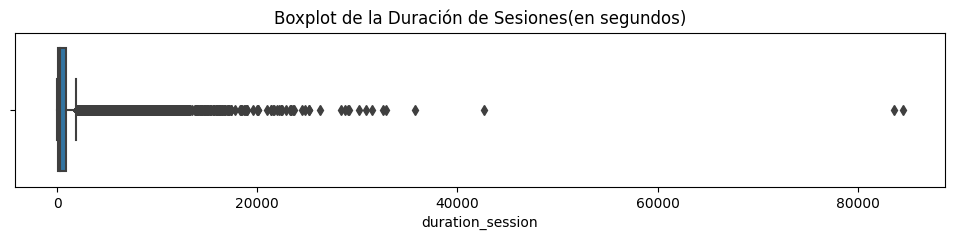

In [39]:
# Creamos un boxplot para visualizar la distribución de la duración de las sesiones en segundos
plt.figure(figsize=(12, 2))
sns.boxplot(x=visits['duration_session'])
plt.title('Boxplot de la Duración de Sesiones(en segundos)')
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Es evidente en las gráficas que en diciembre hay un aumento tanto en el número de usuarios como en el de sesiones, probablemente debido a los días festivos. En particular, la gráfica de valores absolutos muestra un incremento en las sesiones en relación con los usuarios, lo cual sugiere que cada usuario realiza más visitas en ese periodo.

También se observa que la duración promedio de las sesiones es de 11 minutos, con una mediana de 5 minutos y una moda de 1 minuto. La mayoría de las sesiones son de duración similar, salvo dos sesiones que destacan como valores atípicos en la gráfica de caja, posiblemente porque el usuario dejó la sesión abierta. Sin embargo, consideramos que estos valores no alteran significativamente nuestro análisis.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran trabajo analizando la duración de las sesiones! La integración de las estadísticas descriptivas, junto con las visualizaciones como el histograma y el boxplot, proporciona un panorama completo sobre cómo varía la duración de las sesiones. Es especialmente útil observar los diferentes puntos de referencia, como la media, mediana y moda, lo cual agrega profundidad a tu análisis.

El detalle sobre el incremento de usuarios y sesiones en diciembre, así como la identificación de posibles valores atípicos en la duración de las sesiones, es una observación acertada. Este enfoque te permitirá tener una mejor comprensión de las tendencias de uso. ¡Excelente progreso!
</div>

In [40]:
# Agrupamos visitas por usuario y obtenemos la fecha de su primera sesión, renombrando columnas a 'uid' y 'first_session'
first_visits = visits.groupby('uid')['start_ts'].min().reset_index()
first_visits.columns = ['uid','first_session']
first_visits.head()

,uid,first_session
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [41]:
# Extraemos la fecha y el mes de la primera sesión de cada usuario
first_visits['first_session_date'] = first_visits['first_session'].dt.date
first_visits['first_session_month'] = first_visits['first_session'].dt.month
first_visits.head()

,uid,first_session,first_session_date,first_session_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,3
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2
2,297729379853735,2017-06-07 18:47:00,2017-06-07,6
3,313578113262317,2017-09-18 22:49:00,2017-09-18,9
4,325320750514679,2017-09-30 14:29:00,2017-09-30,9


In [42]:
# Unimos el DataFrame 'first_visits' con 'visits' por el identificador de usuario ('uid')
# Calculamos el tiempo de permanencia en meses ('tenure_in_months') como la diferencia entre la fecha de la sesión y la primera sesión
visits_full = pd.merge(first_visits, visits, on='uid')
visits_full = pd.merge(first_visits, visits, on = 'uid')
visits_full['tenure_in_months'] = ((visits_full['session_date']-visits_full['first_session_date'])/(30*np.timedelta64(1,'D'))).round().astype('int')
visits_full.head()

,uid,first_session,first_session_date,first_session_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,duration_session,tenure_in_months
0,11863502262781,2018-03-01 17:27:00,2018-03-01,3,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,3,9,2018-03-01,360,0
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,2,6,2018-02-06,120,0
2,297729379853735,2017-06-07 18:47:00,2017-06-07,6,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,6,23,2017-06-07,60,0
3,313578113262317,2017-09-18 22:49:00,2017-09-18,9,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,3,10,2018-03-11,360,6
4,313578113262317,2017-09-18 22:49:00,2017-09-18,9,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,9,38,2017-09-18,1080,0


In [43]:
# Creamos una tabla dinámica que agrupa los usuarios únicos ('uid') por mes de la primera sesión
# y tiempo de permanencia en meses ('tenure_in_months')
cohortes = visits_full.pivot_table(
    index = 'first_session_month',
    columns = 'tenure_in_months',
    values = 'uid',
    aggfunc = 'nunique'
)
cohortes.fillna('')

tenure_in_months,0,1,2,3,4,5,6,7,8,9,10,11,12
first_session_month,,,,,,,,,,,,,
1,22624.0,1191.0,830.0,557.0,421.0,47.0,,,,,,,
2,22197.0,1039.0,602.0,407.0,67.0,,,,,,,,
3,20589.0,835.0,533.0,81.0,,,,,,,,,
4,15709.0,614.0,82.0,,,,,,,,,,
5,15273.0,100.0,,,,,,,,,,,
6,13259.0,955.0,720.0,775.0,944.0,847.0,875.0,713.0,746.0,659.0,576.0,513.0,272.0
7,13140.0,716.0,688.0,675.0,767.0,609.0,606.0,619.0,527.0,379.0,337.0,113.0,
8,10181.0,691.0,634.0,577.0,547.0,412.0,438.0,340.0,299.0,243.0,58.0,,
9,16704.0,1239.0,1117.0,816.0,683.0,642.0,571.0,420.0,366.0,61.0,,,


In [44]:
# Ordenamos las filas de la tabla dinámica 
cohortes = cohortes.loc[[6,7,8,9,10,11,12,1,2,3,4,5]]

In [45]:
# Creamos un DataFrame vacío llamado 'retention' para almacenar datos de retención de usuarios
retention = pd.DataFrame() 

In [46]:
# Calculamos la tasa de retención de usuarios por mes de permanencia y la agregamos al DataFrame 'retention'
# Dividimos el número de usuarios en cada mes por el número de usuarios en el primer mes (columna 0)
for col in cohortes.columns:
    retention = pd.concat([retention, cohortes[col]/cohortes[0]],axis=1)

In [47]:
# Asignamos los nombres de las columnas de 'cohortes' al DataFrame 'retention' para mantener la consistencia
retention.columns = cohortes.columns

In [48]:
# Formateamos los índices del DataFrame 'retention' como cadenas de texto, limitando la longitud a 12 caracteres
retention.index = [str(indice)[0:12] for indice in retention.index]

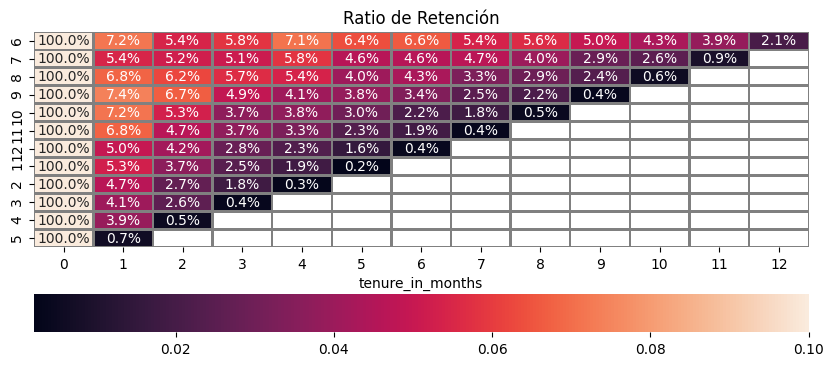

In [49]:
# Creamos una figura para visualizar el ratio de retención mediante un mapa de calor
plt.figure(figsize=(10,4))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey', vmax=0.1, cbar_kws={'orientation':'horizontal'}).set(title='Ratio de Retención')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente visualización de la retención de usuarios. El mapa de calor permite observar claramente la disminución de la retención tras el primer mes, destacando patrones estacionales y variaciones en los diferentes meses de ingreso. La estructura de los datos es clara y facilita la interpretación de los períodos críticos donde la retención es más baja. Muy buen trabajo en resaltar estos detalles. ¡Continúa así!
</div>


In [50]:
# Calculamos y mostramos el promedio del ratio de retención para el segundo mes de permanencia (índice 1)
print(retention[1].mean())

0.05361100820922162


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La gráfica muestra una rápida caída en la retención de usuarios después del primer mes, con un promedio general de retención de alrededor del 5.36%. Se observa una ligera influencia estacional, posiblemente en diciembre, pero junio destaca como el mes con la mayor retención inicial, mientras que septiembre muestra una caída más pronunciada en los primeros meses, quedando por debajo del promedio general a partir del tercer mes. En general, a partir del sexto mes, la retención es bastante baja (alrededor del 2% o menos). En resumen, la mayoría de los usuarios interactúan poco tiempo después de su primera compra, con una retención que disminuye de manera drástica con el tiempo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente análisis de retención! La estructura de la tabla de cohortes junto con el cálculo y visualización del ratio de retención logran captar perfectamente la tendencia de los usuarios a lo largo del tiempo. La elección de usar un mapa de calor permite una interpretación rápida de las variaciones de retención por mes y destaca de forma clara la caída en la retención después del primer mes.

Además, el cálculo del promedio de retención en el segundo mes es una adición valiosa que brinda contexto adicional sobre el comportamiento de los usuarios a corto plazo. Has realizado un trabajo detallado en analizar los patrones estacionales y diferencias entre meses. Mantén este enfoque preciso y completo en tus análisis futuros. ¡Excelente trabajo!
</div>

In [51]:
# Creamos un DataFrame para identificar la fecha de la primera compra por usuario, renombramos la columna a 'first_purchase'
# Agregamos una nueva columna 'first_purchase_date' que contenga solo la fecha sin la hora
first_purchase = orders[['uid','buy_ts']].groupby('uid')['buy_ts'].min().reset_index()
first_purchase.columns = ['uid','first_purchase']
first_purchase['first_purchase_date'] = first_purchase['first_purchase'].dt.date
first_purchase.head()

,uid,first_purchase,first_purchase_date
0,313578113262317,2018-01-03 21:51:00,2018-01-03
1,1575281904278712,2017-06-03 10:13:00,2017-06-03
2,2429014661409475,2017-10-11 18:33:00,2017-10-11
3,2464366381792757,2018-01-28 15:54:00,2018-01-28
4,2551852515556206,2017-11-24 10:14:00,2017-11-24


In [52]:
# Unimos las tablas visits y orders por uid y calculamos la diferencia en días entre la primera visita y la primera compra
users_chr = pd.merge(first_visits, first_purchase, on='uid', how='inner')

# Calculamos la diferencia en días
users_chr['conversion_days'] = (users_chr['first_purchase'] - users_chr['first_session']).dt.days

users_chr.head()

,uid,first_session,first_session_date,first_session_month,first_purchase,first_purchase_date,conversion_days
0,313578113262317,2017-09-18 22:49:00,2017-09-18,9,2018-01-03 21:51:00,2018-01-03,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,6,2017-06-03 10:13:00,2017-06-03,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,10,2017-10-11 18:33:00,2017-10-11,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,1,2018-01-28 15:54:00,2018-01-28,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,11,2017-11-24 10:14:00,2017-11-24,0


In [53]:
# Creamos la categoría de conversión
def categorize_conversion(days):
    return f'{days}d'

In [54]:
# Asignamos categorías de conversión a los usuarios basadas en el número de días hasta la conversión
users_chr['conversion_category'] = users_chr['conversion_days'].apply(categorize_conversion)
users_chr.head()

,uid,first_session,first_session_date,first_session_month,first_purchase,first_purchase_date,conversion_days,conversion_category
0,313578113262317,2017-09-18 22:49:00,2017-09-18,9,2018-01-03 21:51:00,2018-01-03,106,106d
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,6,2017-06-03 10:13:00,2017-06-03,0,0d
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,10,2017-10-11 18:33:00,2017-10-11,0,0d
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,1,2018-01-28 15:54:00,2018-01-28,0,0d
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,11,2017-11-24 10:14:00,2017-11-24,0,0d


In [55]:
# Identificamos el origen (source_id) de las primeras órdenes de cada usuario,
# asumiendo que el origen es el mismo que el de la sesión en la que se realizó la primera orden.

# Creamos id único para las órdenes y le pegamos todas las sesiones por usuario (uid)
orders_idx = orders.reset_index().merge(visits, on='uid', how = 'left')
orders_idx.rename(columns={'index': 'order_id'}, inplace=True)

# Nos quedamos solo con aquellas órdenes de las cuales se puede rastrear la sessión de origen
orders_idx = orders_idx[(orders_idx['buy_ts'] >= orders_idx['start_ts']) & (orders_idx['buy_ts'] <= orders_idx['end_ts'])]

# Observamos que hay ordenes a las cuales no se les puede imputar una sesion, por simplicidad las ignoramos.

# Juntamos las ódenes de las cuales identificamos el source_id con todas las órdenes.
orders_idx = orders.reset_index().merge(orders_idx[['order_id','source_id', 'device']], left_on = 'index', right_on = 'order_id', how='left')

# Nos quedamos solo con las primeras órdenes de cada usuario
orders_idx = orders_idx.sort_values(by='buy_ts').drop_duplicates(subset='uid')

# creamos la variable buy_date

orders_idx['first_purchase_date'] = orders_idx['buy_ts'].dt.date

# agregamos la categoria de cada usuario
orders_idx = orders_idx.fillna(99999).merge(users_chr[['uid', 'conversion_category']], on = 'uid')

orders_idx.head()



,index,buy_ts,revenue,uid,order_id,source_id,device,first_purchase_date,conversion_category
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,0.0,1.0,desktop,2017-06-01,0d
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,1.0,2.0,desktop,2017-06-01,0d
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2.0,2.0,desktop,2017-06-01,0d
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,3.0,2.0,desktop,2017-06-01,0d
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,4.0,3.0,desktop,2017-06-01,0d


In [56]:
# Agrupamos los datos de usuarios por 'source_id' y 'first_purchase_date', contando el número de usuarios únicos ('uid') y sumando los ingresos ('revenue'). 
# Luego, convertimos 'first_purchase_date' a formato datetime y fusionamos con la tabla de costos para añadir los gastos relacionados. 
# Calculamos los costos e ingresos unitarios dividiendo los totales por el número de órdenes, y renombramos las columnas para mayor claridad en la presentación de los resultados.

agg_cost_revenue = orders_idx.groupby(['source_id','first_purchase_date']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index()
agg_cost_revenue['first_purchase_date'] = pd.to_datetime(agg_cost_revenue['first_purchase_date'])
agg_cost_revenue = agg_cost_revenue.merge(costs, left_on = ['source_id','first_purchase_date'], right_on = ['source_id', 'dt'], how='left')
agg_cost_revenue['unitary_cost'] = agg_cost_revenue['costs']/agg_cost_revenue['uid']
agg_cost_revenue['unitary_revenue'] = agg_cost_revenue['revenue']/agg_cost_revenue['uid']
agg_cost_revenue.rename(columns={'uid':'total_orders', 'revenue':'total_revenue', 'costs':'total_costs'}, inplace = True)
agg_cost_revenue.head()

,source_id,first_purchase_date,total_orders,total_revenue,dt,total_costs,unitary_cost,unitary_revenue
0,1.0,2017-06-01,16,164.38,2017-06-01,75.20,4.700000,10.273750
1,1.0,2017-06-02,9,51.46,2017-06-02,62.25,6.916667,5.717778
2,1.0,2017-06-03,7,15.91,2017-06-03,36.53,5.218571,2.272857
3,1.0,2017-06-04,4,10.20,2017-06-04,55.00,13.750000,2.550000
4,1.0,2017-06-05,17,47.94,2017-06-05,57.08,3.357647,2.820000


In [57]:
# Agrupamos los pedidos por 'source_id', 'first_purchase_date' y 'conversion_category',
# contando usuarios únicos ('uid') y sumando ingresos ('revenue'), 
# luego ordenamos los resultados por 'source_id' y 'first_purchase_date'.

orders_idx.groupby(['source_id','first_purchase_date', 'conversion_category']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index().sort_values(by=['source_id', 'first_purchase_date'])


,source_id,first_purchase_date,conversion_category,uid,revenue
0,1.0,2017-06-01,0d,16,164.38
1,1.0,2017-06-02,0d,8,49.63
2,1.0,2017-06-02,1d,1,1.83
3,1.0,2017-06-03,0d,7,15.91
4,1.0,2017-06-04,0d,4,10.20
...,...,...,...,...,...
11862,99999.0,2018-05-31,7d,1,4.89
11863,99999.0,2018-05-31,8d,1,1.22
11864,99999.0,2018-05-31,92d,2,9.16
11865,99999.0,2018-05-31,94d,1,4.89


In [58]:
# Agrupamos los datos de usuarios por 'source_id', 'first_purchase_date' y 'conversion_category', 
# contando el número de usuarios únicos ('uid') y sumando los ingresos ('revenue'). 
# Luego, convertimos 'first_purchase_date' a formato datetime y renombramos la columna 'uid' a 'orders' para mayor claridad. 
# Fusionamos con el DataFrame 'agg_cost_revenue' para incluir información sobre costos y calculamos los costos totales multiplicando los costos unitarios por el número de órdenes.

cohort_conversion = orders_idx.fillna(99999).groupby(['source_id','first_purchase_date', 'conversion_category']).agg({'uid':'nunique', 'revenue':'sum'}).reset_index().sort_values(by=['source_id', 'first_purchase_date'])
cohort_conversion['first_purchase_date'] = pd.to_datetime(cohort_conversion['first_purchase_date'])
cohort_conversion.rename(columns={'uid':'orders'}, inplace = True)
cohort_conversion = cohort_conversion.merge(agg_cost_revenue, on = ['source_id', 'first_purchase_date'])
cohort_conversion['costs'] = cohort_conversion['unitary_cost']*cohort_conversion['orders']

cohort_conversion.head()

,source_id,first_purchase_date,conversion_category,orders,revenue,total_orders,total_revenue,dt,total_costs,unitary_cost,unitary_revenue,costs
0,1.0,2017-06-01,0d,16,164.38,16,164.38,2017-06-01,75.20,4.700000,10.273750,75.200000
1,1.0,2017-06-02,0d,8,49.63,9,51.46,2017-06-02,62.25,6.916667,5.717778,55.333333
2,1.0,2017-06-02,1d,1,1.83,9,51.46,2017-06-02,62.25,6.916667,5.717778,6.916667
3,1.0,2017-06-03,0d,7,15.91,7,15.91,2017-06-03,36.53,5.218571,2.272857,36.530000
4,1.0,2017-06-04,0d,4,10.20,4,10.20,2017-06-04,55.00,13.750000,2.550000,55.000000


In [59]:
# Ordenamos por la columna 'conversion_category' para facilitar el análisis de las categorías de conversión
cohort_conversion.sort_values(by='conversion_category')
cohort_conversion.head()

,source_id,first_purchase_date,conversion_category,orders,revenue,total_orders,total_revenue,dt,total_costs,unitary_cost,unitary_revenue,costs
0,1.0,2017-06-01,0d,16,164.38,16,164.38,2017-06-01,75.20,4.700000,10.273750,75.200000
1,1.0,2017-06-02,0d,8,49.63,9,51.46,2017-06-02,62.25,6.916667,5.717778,55.333333
2,1.0,2017-06-02,1d,1,1.83,9,51.46,2017-06-02,62.25,6.916667,5.717778,6.916667
3,1.0,2017-06-03,0d,7,15.91,7,15.91,2017-06-03,36.53,5.218571,2.272857,36.530000
4,1.0,2017-06-04,0d,4,10.20,4,10.20,2017-06-04,55.00,13.750000,2.550000,55.000000


In [60]:
# Agrupamos los datos por 'source_id', sumamos las métricas y restablecemos el índice para obtener un DataFrame limpio
cohort_conversion.groupby('source_id').sum().reset_index()

,source_id,orders,revenue,total_orders,total_revenue,total_costs,unitary_cost,unitary_revenue,costs
0,1.0,3647,15980.19,16469,70883.50,81557.80,7425.156702,5266.175444,20719.96
1,2.0,3031,15244.85,14319,75674.92,164588.25,19653.563759,6062.629661,42722.36
2,3.0,7099,27070.73,28773,107117.48,540183.24,25734.869004,4578.628238,141321.63
3,4.0,7552,29864.28,41563,160557.46,293737.39,13565.239066,6341.465181,61057.91
4,5.0,5947,25352.17,21417,91092.29,183109.15,10717.995396,4856.999846,51756.40
5,7.0,1,1.22,1,1.22,0.00,0.000000,1.220000,0.00
6,9.0,588,1896.10,1567,4542.29,6568.60,2906.077285,1206.917393,3768.78
7,10.0,1029,2749.25,1766,4996.47,7371.78,2951.068150,1095.412592,5140.98
8,99999.0,7629,33061.88,135450,584123.99,0.00,0.000000,20248.028035,0.00


In [61]:
# Agrupamos por 'source_id' y contamos el número de usuarios únicos que realizaron conversiones
total_conversions_by_source = orders_idx.groupby('source_id')['uid'].nunique().reset_index(name='total_count')
total_conversions_by_source


,source_id,total_count
0,1.0,3647
1,2.0,3031
2,3.0,7099
3,4.0,7552
4,5.0,5947
5,7.0,1
6,9.0,588
7,10.0,1029
8,99999.0,7629


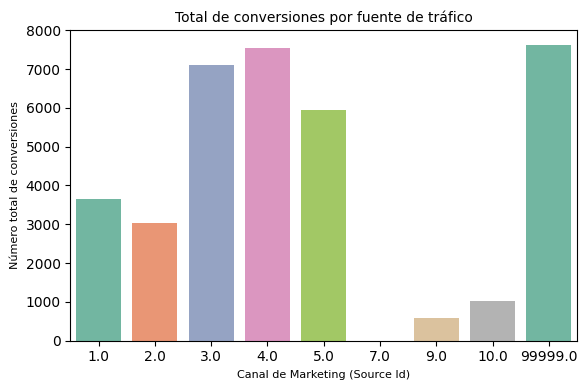

In [62]:
# Creamos el gráfico de barras para mostrar el total de conversiones por cada canal de marketing (source_id)
plt.figure(figsize=(6, 4))
sns.barplot(x='source_id', y='total_count', data=total_conversions_by_source, palette='Set2')
plt.title('Total de conversiones por fuente de tráfico', fontsize=10)
plt.xlabel('Canal de Marketing (Source Id)', fontsize=8)
plt.ylabel('Número total de conversiones', fontsize=8)
plt.tight_layout()
plt.show()


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
La tabla muestra clientes que se convirtieron en su primera compra, clasificados por fuente de tráfico. La fuente 9999 concentra la mayoría de las conversiones, debido a que las fechas de sesión y compra no coinciden, dificultando la asignación a un canal específico. Las fuentes 4, 3, 5 y 1 también destacan por su efectividad. Es importante revisar la fuente 9999 y mejorar el seguimiento de sesiones para lograr una atribución más precisa y optimizar las estrategias de adquisición.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente trabajo en el análisis de conversión y atribución por fuente de tráfico. Has utilizado técnicas sólidas para identificar la primera compra y categorizar los usuarios en función de su tiempo de conversión, lo cual proporciona información útil para optimizar estrategias de adquisición. La creación de métricas como el costo e ingresos unitarios por fuente es muy valiosa para entender el retorno de inversión.

La observación sobre la fuente 9999 es muy relevante, y es positivo que notes la importancia de mejorar el seguimiento de sesiones para lograr una atribución más precisa. ¡Sigue así y continúa refinando tu enfoque en la atribución de marketing!
</div>


Ahora procedemos a analizar la informacion de ventas para saber cuántos pedidos se hacen durante un período de tiempo determinado.

In [63]:
# Creamos una nueva columna que extrae el año y el mes de la columna 'buy_ts'
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# Agrupamos por mes, contamos el número de pedidos y ordenamos de mayor a menor
orders_by_month = orders.groupby('order_month').size().reset_index(name='total_orders')
orders_by_month = orders_by_month.sort_values(by='total_orders', ascending=False)
orders_by_month

,order_month,total_orders
6,2017-12,6218
4,2017-10,5679
5,2017-11,5659
9,2018-03,5326
8,2018-02,5281
7,2018-01,4721
11,2018-05,4346
3,2017-09,3387
10,2018-04,3273
1,2017-07,2363


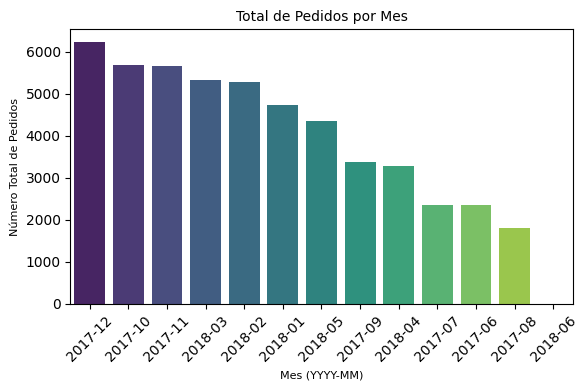

In [64]:
# Creamos el gráfico de barras para mostrar el número de pedidos por mes
plt.figure(figsize=(6, 4))
sns.barplot(x='order_month', y='total_orders', data=orders_by_month, palette='viridis')
plt.title('Total de Pedidos por Mes', fontsize=10)
plt.xlabel('Mes (YYYY-MM)', fontsize=8)
plt.ylabel('Número Total de Pedidos', fontsize=8)
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
Como mencionamos anteriormente, la estacionalidad en las compras se debe a los días festivos. Diciembre de 2017 es el mes con mayores ventas, seguido de octubre y noviembre de ese mismo año. Por otro lado, agosto de 2017 registró las menores ventas. No incluimos junio de 2018 en este análisis, ya que fue el mes en que se realizó el corte de datos y solo se registraron unos pocos pedidos, lo que afecta la representatividad de ese periodo. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Excelente visualización y análisis de la estacionalidad en las ventas. Es muy positivo que hayas identificado el impacto de los días festivos en el aumento de las ventas durante el último trimestre del año. La decisión de excluir junio de 2018 por falta de representatividad es acertada y demuestra un enfoque riguroso en el análisis de datos. 

Esta interpretación de los patrones estacionales es clave para optimizar campañas de marketing y ajustar inventarios. ¡Buen trabajo! Continúa profundizando en el análisis de estacionalidad, ya que es una habilidad valiosa en el análisis de ventas.
</div>


A continuación, procederemos a analizar el tamaño promedio de compra.

In [65]:
# Calculamos el ingreso total
total_revenue = orders['revenue'].sum()

# Contamos el número total de pedidos
total_orders = orders.shape[0]

# Calculamos el tamaño promedio de compra
average_purchase_size = total_revenue / total_orders if total_orders > 0 else 0  # Evitar división por cero

print(f'Tamaño promedio de compra: ${average_purchase_size:.2f}')

Tamaño promedio de compra: $5.00


Ahora, analizaremos ¿Cuánto dinero generan los clientes a lo largo de su relación con la empresa? Esto se conoce como LTV (Lifetime Value, por sus siglas en inglés).

In [66]:
# Calculamos los ingresos totales por cliente (uid)
ltv_per_customer = orders.groupby('uid')['revenue'].sum().reset_index()
ltv_per_customer.head()

,uid,revenue
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99


In [67]:
# Calculamos el LTV promedio agrupando por el usuario (uid) y obteniendo la media de los ingresos (revenue).
ltv_per_customer = orders.groupby('uid')['revenue'].mean().reset_index()
ltv_per_customer.head()

# Calculamos el LTV promedio general a partir del DataFrame creado.
average_ltv = ltv_per_customer['revenue'].mean()

# Imprimimos el LTV promedio por cliente, formateado a dos decimales.
print(f'El LTV promedio por cliente es: ${average_ltv:.2f}')


El LTV promedio por cliente es: $4.09


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El tamaño promedio de compra es de 5, mientras que el LTV promedio por cliente es de 4.09. Esto sugiere que, aunque las transacciones son mayores que el valor generado por cliente a lo largo de su vida, la rentabilidad a largo plazo podría ser problemática, ya que los clientes pueden no estar realizando suficientes compras adicionales o tienen una baja tasa de retención.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente análisis del tamaño promedio de compra y del LTV! La interpretación de los resultados es acertada, y has resaltado un punto clave: la discrepancia entre el valor de una transacción promedio y el valor generado por cliente a lo largo del tiempo. Esto es fundamental para evaluar la rentabilidad y la retención de clientes.

Es una muy buena práctica señalar posibles implicaciones de los datos, como el hecho de que una baja tasa de retención podría afectar la rentabilidad a largo plazo. Te animo a seguir profundizando en estrategias que puedan incrementar el LTV, como programas de fidelización o campañas para aumentar la frecuencia de compra. ¡Buen trabajo y sigue así!
</div>


Ahora analizaremos el área de Marketing, abordando las siguientes preguntas: ¿Cuánto dinero se gastó? Esto incluye el gasto total, el desglose por fuente de adquisición y el análisis a lo largo del tiempo. También exploraremos cuál fue el costo de adquisición de clientes (CAC) para cada una de las fuentes. Por último, analizaremos qué tan rentables fueron las inversiones, utilizando el indicador de rentabilidad de las inversiones en marketing (ROMI).

In [68]:
# Calculamos el gasto total
total_marketing_costs = costs['costs'].sum()
print(f'Gasto total en marketing: ${total_marketing_costs:.2f}')

Gasto total en marketing: $329131.62


In [69]:
# Calculamos los gastos por fuente de adquisición
costs_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source


,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


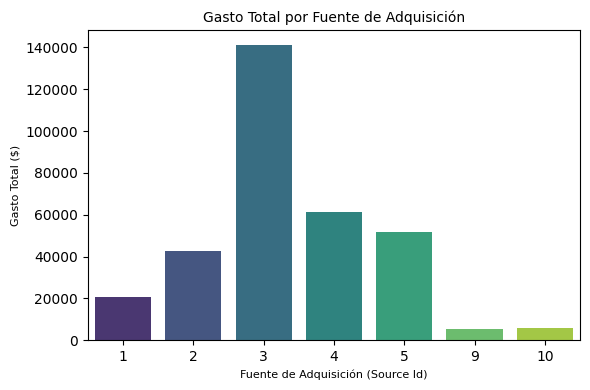

In [70]:
# Graficamos gastos por fuente
plt.figure(figsize=(6, 4))
sns.barplot(x='source_id', y='costs', data=costs_by_source, palette='viridis')
plt.title('Gasto Total por Fuente de Adquisición', fontsize=10)
plt.xlabel('Fuente de Adquisición (Source Id)', fontsize=8)
plt.ylabel('Gasto Total ($)', fontsize=8)
plt.tight_layout()
plt.show()

In [71]:
# Agrupamos los gastos por fecha y calculamos el total gastado por día
costs_by_date = costs.groupby('dt')['costs'].sum().reset_index()
costs_by_date.head()


,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


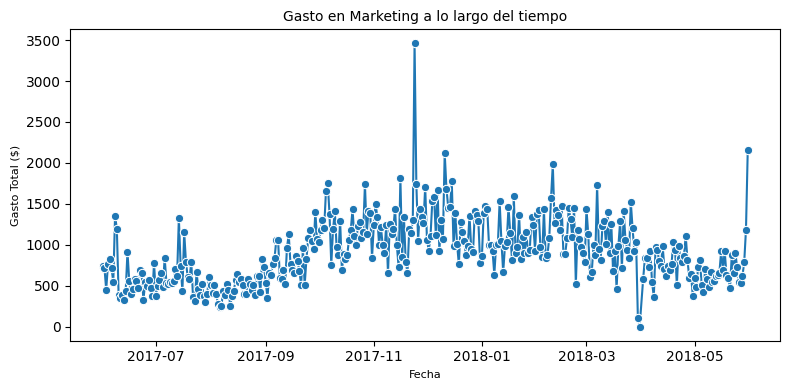

In [72]:
# Gráfico de línea para mostrar el gasto a lo largo del tiempo
plt.figure(figsize=(8,4))
sns.lineplot(x='dt', y='costs', data=costs_by_date, marker='o')
plt.title('Gasto en Marketing a lo largo del tiempo', fontsize=10)
plt.xlabel('Fecha', fontsize=8)
plt.ylabel('Gasto Total ($)', fontsize=8)
plt.tight_layout()
plt.show()


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
El gasto total en marketing de $329,131.62 está concentrado en algunas fuentes clave, siendo la fuente 3 la más relevante, representando aproximadamente el 42.9 porciento del total. Las fuentes 4 y 5 también contribuyen significativamente, mientras que las fuentes 1, 2, 9 y 10 tienen gastos menores. Además, la gráfica del gasto a lo largo del tiempo muestra que el mayor gasto coincide con diciembre, que es también el mes con el mayor volumen de compras. Esto sugiere que las inversiones en marketing están alineadas con los picos de ventas, lo que podría indicar una estrategia efectiva. 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran trabajo analizando los gastos de marketing y destacando su concentración en fuentes clave! Es excelente que hayas observado la alineación entre el gasto en marketing y los picos de ventas, lo cual puede ser indicativo de una estrategia bien sincronizada. 

La estructura del análisis es clara, y las visualizaciones permiten una interpretación rápida de los puntos más importantes, como la preponderancia de la fuente 3 y el incremento de gasto en diciembre. Continúa explorando esta línea de análisis, tal vez enfocándote en cómo se correlaciona el gasto con el retorno de inversión (ROMI) para mejorar aún más la rentabilidad. ¡Sigue adelante!
</div>


A continuación, calcularemos el CAC (costo de adquisición de clientes) para cada una de las fuentes. Esta métrica es esencial para determinar la inversión necesaria para adquirir un nuevo cliente y evaluar la eficiencia de nuestras estrategias de marketing, asegurando que los gastos estén alineados con los ingresos generados por cada cliente.

In [73]:
# Calculamos el CAC al combinar las conversiones totales por fuente con los costos. 
# Renombramos 'total_count' a 'new_clients' y luego calculamos el CAC dividiendo los costos por el número de nuevos clientes
cac = total_conversions_by_source.merge(costs_by_source, on= 'source_id')
cac.rename(columns={'total_count':'new_clients'}, inplace=True)
cac ['cac'] = cac ['costs'] / cac ['new_clients']
cac.head()

,source_id,new_clients,costs,cac
0,1.0,3647,20833.27,5.712440
1,2.0,3031,42806.04,14.122745
2,3.0,7099,141321.63,19.907259
3,4.0,7552,61073.60,8.087076
4,5.0,5947,51757.10,8.703060


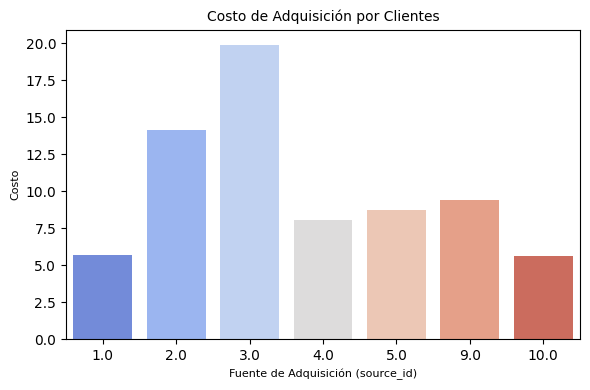

In [74]:
# Creamos la gráfica de barras con los datos de CAC (Costo de Adquisición por Clientes)
plt.figure(figsize=(6, 4))
sns.barplot(x='source_id', y='cac', data=cac, palette='coolwarm')
plt.title('Costo de Adquisición por Clientes', fontsize=10)
plt.xlabel('Fuente de Adquisición (source_id)', fontsize=8)
plt.ylabel('Costo', fontsize=8)
plt.tight_layout()
plt.show()

In [79]:
# Procedemos a calcular el CAC promedio por usuario, sumamos total de costos y de nuevos clientes
# Sumamos total de costos y de nuevos clientes
total_costs = cac['costs'].sum()
total_new_clients = cac['new_clients'].sum()
average_cac_per_user = total_costs / total_new_clients if total_new_clients > 0 else 0

print(f'El CAC promedio por usuario es: ${average_cac_per_user:.2f}')

El CAC promedio por usuario es: $11.39


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente implementación del análisis del Costo de Adquisición de Clientes (CAC)! Es claro que comprendes la importancia de esta métrica para evaluar la eficiencia de las estrategias de marketing y su impacto en el crecimiento de la base de clientes. La estructura de cálculo y la gráfica son precisas y ayudan a visualizar el costo de adquisición por cada fuente de tráfico.

Además, la inclusión del CAC promedio por usuario aporta un valor adicional, permitiendo una visión global de los costos por cliente. Es una excelente base para futuras recomendaciones estratégicas. ¡Sigue así!
</div>


A continuación, procederemos a calcular el ROMI(Return on Marketing Investment)por medio de la fuente, una métrica que mide la efectividad de las inversiones en marketing. El ROMI nos permite evaluar el retorno generado por cada dólar gastado en campañas publicitarias, ayudándonos a identificar qué estrategias funcionan y cuáles necesitan ajustes. Este cálculo es esencial para optimizar nuestro presupuesto y maximizar el impacto de nuestras iniciativas de marketing.

In [75]:
# Creamos id único para las órdenes y le pegamos todas las sesiones por usuario (uid)
orders_all = orders.reset_index().merge(visits, on='uid', how = 'left')
orders_all.rename(columns={'index': 'order_id'}, inplace=True)

# Nos quedamos solo con aquellas órdenes de las cuales se puede rastrear la sessión de origen
orders_all = orders_all[(orders_all['buy_ts'] >= orders_all['start_ts']) & (orders_all['buy_ts'] <= orders_all['end_ts'])]

orders_all.head()

,order_id,buy_ts,revenue,uid,order_month,device,end_ts,source_id,start_ts,session_month,session_week,session_date,duration_session
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06,desktop,2017-06-01 00:11:00,1,2017-06-01 00:09:00,6,22,2017-06-01,120
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06,desktop,2017-06-01 00:25:00,2,2017-06-01 00:14:00,6,22,2017-06-01,660
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06,desktop,2017-06-01 00:34:00,2,2017-06-01 00:25:00,6,22,2017-06-01,540
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06,desktop,2017-06-01 00:33:00,2,2017-06-01 00:14:00,6,22,2017-06-01,1140
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06,desktop,2017-06-01 07:59:00,3,2017-06-01 07:31:00,6,22,2017-06-01,1680


In [76]:
# Agrupamos 'orders_all' por 'source_id' y calculamos el ingreso total de cada fuente de adquisición.
all_orders_revenue = orders_all.groupby(by= 'source_id').agg({'revenue': 'sum'})
all_orders_revenue.head()

,revenue
source_id,
1,28709.91
2,33760.87
3,30449.76
4,34638.76
5,33732.60


In [77]:
# Combinamos los ingresos y costos por fuente y calculamos el ROMI (%) para cada fuente de adquisición.
romi = all_orders_revenue.merge(costs_by_source, on= 'source_id')
romi ['romi'] = ((romi ['revenue'] - romi ['costs']) / romi ['costs']) * 100
romi

,source_id,revenue,costs,romi
0,1,28709.91,20833.27,37.807987
1,2,33760.87,42806.04,-21.130593
2,3,30449.76,141321.63,-78.453574
3,4,34638.76,61073.60,-43.283579
4,5,33732.60,51757.10,-34.825174
5,9,2763.54,5517.49,-49.913095
6,10,3089.27,5822.49,-46.942459


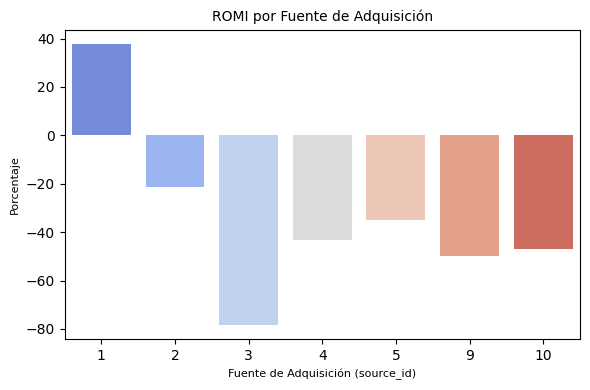

In [78]:
# Realizamos gráfica para un mejor análisis del ROMI
plt.figure(figsize=(6, 4))
sns.barplot(x='source_id', y='romi', data=romi, palette='coolwarm')
plt.title('ROMI por Fuente de Adquisición', fontsize=10)
plt.xlabel('Fuente de Adquisición (source_id)', fontsize=8)
plt.ylabel('Porcentaje', fontsize=8)
plt.tight_layout()
plt.show()


<div style="background-color: lightblue; padding: 10px; border-radius: 5px;">
De las fuentes de adquisición analizadas, solo la fuente número 1 tiene un ROMI superior al 0%, lo que indica que generó más ingresos que los costos invertidos y fue, por tanto, rentable. En contraste, el ROMI negativo en las demás fuentes señala que esas inversiones resultaron en pérdidas.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Gran trabajo calculando el ROMI para evaluar la efectividad de las inversiones en marketing! La metodología está bien estructurada, y la combinación de costos e ingresos por fuente permite obtener un análisis claro del retorno de inversión. Además, la gráfica facilita la interpretación de los resultados, resaltando las fuentes rentables y aquellas que requieren ajustes.

Esta métrica proporciona una base sólida para optimizar la asignación de presupuesto en futuras campañas. Continúa aplicando estos análisis detallados; son fundamentales para tomar decisiones informadas y mejorar la rentabilidad. ¡Excelente esfuerzo!
</div>


Conclusión general y recomendaciones


A partir del análisis de datos sobre la retención de usuarios, el gasto en marketing y el retorno de inversión (ROMI), se pueden hacer recomendaciones concretas para optimizar la inversión en marketing. Es fundamental concentrar los recursos en las fuentes que han mostrado efectividad, específicamente en la fuente 1, que es la única con un ROMI positivo. Esto indica que ha generado ingresos que superan los costos de adquisición, lo que la convierte en una opción rentable. Aumentar la inversión en esta fuente podría maximizar su efectividad y potenciar su rendimiento.

Además, la fuente 3 es relevante, representando aproximadamente el 42.9% del gasto total. Se recomienda aumentar la inversión en esta fuente también, ya que su potencial de conversión es significativo y podría generar un mayor número de ingresos. Las fuentes 4 y 5 también han mostrado resultados favorables y deben ser analizadas más a fondo para identificar las características que contribuyen a su éxito.

Es importante mencionar que la fuente 9999 refleja sesiones donde no pudimos asignar una fuente de adquisición específica, ya que las fechas de las sesiones no coincidían con las fechas de la primera compra, que consideramos como la conversión. Esto destaca la necesidad de mejorar el seguimiento de sesiones y la atribución de conversiones para optimizar las estrategias de marketing y asegurarnos de que los fondos se dirijan a las fuentes más efectivas.

Un hallazgo crítico es que el LTV promedio por usuario es de 4.09, mientras que el CAC promedio por usuario es de 11.39. Esto significa que la empresa está gastando más en adquirir clientes de lo que estos aportan en ingresos a lo largo de su vida. Esta discrepancia representa un riesgo significativo para la rentabilidad a largo plazo, ya que la empresa pierde dinero por cada cliente adquirido. Para mitigar esta situación, es vital revisar las estrategias de retención de clientes y buscar formas de aumentar la frecuencia de compra para elevar el LTV.

Por último, se debe considerar una estrategia general de optimización del gasto en marketing. Se recomienda redirigir fondos de fuentes con ROMI negativo hacia aquellas que han demostrado ser más rentables. Las métricas clave a evaluar en este proceso incluyen la tasa de conversión y el costo por adquisición, que permitirán medir la efectividad de las campañas en cada plataforma.

En resumen, es aconsejable que los expertos en marketing inviertan de manera más agresiva en fuentes que han demostrado ser rentables, como la fuente 1 y la fuente 3, mientras ajustan sus estrategias en las demás. Enfocarse en las métricas de ROMI y conversión permitirá tomar decisiones informadas que impulsen el crecimiento sostenible y mejoren la rentabilidad a largo plazo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Excelente trabajo en la conclusión y las recomendaciones! Has logrado sintetizar de manera clara y precisa los hallazgos clave del análisis, destacando puntos críticos como la efectividad de las fuentes de adquisición y la relación entre el CAC y el LTV. La recomendación de concentrar recursos en las fuentes con ROMI positivo, junto con el llamado a mejorar la atribución de la fuente 9999, muestra un enfoque estratégico orientado a optimizar la rentabilidad de las inversiones en marketing.

Además, el enfoque en ajustar la estrategia de retención para cerrar la brecha entre el LTV y el CAC es fundamental y demuestra una visión completa para mejorar la sostenibilidad a largo plazo. Continúa aplicando este tipo de análisis profundo y orientado a la acción. ¡Muy bien hecho, sigue así!
</div>


## Comentario final del revisor 


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Felicidades Rachel! Tu proyecto está **aprobado**. Has demostrado una sólida comprensión de los conceptos clave en análisis de datos, desde la exploración de la retención de usuarios hasta la evaluación de la rentabilidad de las fuentes de adquisición. A continuación, destaco los puntos positivos y algunas áreas interesantes para seguir investigando:

#### Puntos Positivos:
- **Análisis detallado de marketing**: Lograste un análisis profundo de las fuentes de adquisición, destacando métricas clave como el CAC y el ROMI.
- **Interpretación clara**: Tus conclusiones son claras y muestran un enfoque práctico para la toma de decisiones estratégicas en marketing.
- **Visualización efectiva**: Los gráficos utilizados enriquecen el análisis y permiten una comprensión visual de los datos y las tendencias.

#### Áreas para Seguir Investigando:
- **Optimización de campañas de retención**: Profundiza en estrategias que puedan incrementar el LTV, especialmente aquellas que fomenten la recompra.
- **Mejora en la atribución de conversiones**: Explora cómo mejorar el seguimiento de sesiones para reducir la ambigüedad en fuentes como la 9999.
- **Exploración de fuentes con potencial de mejora**: Aunque algunas fuentes tuvieron un ROMI negativo, quizás ajustando la estrategia en ellas se podría mejorar su desempeño.

¡Sigue así, estás haciendo un gran trabajo! 💪🚀😊
</div>
